The binomial distribution measures how many successes will occur within _n_ trials, given binary outcomes (succeed/fail). We can also model the _n_ trials not as a sequence, but of sampling once from _n_ identical processes in parallel. 

This provides a model of _n_ scheduled events across _n_ nodes firing with a likelihood of _p_. For instance, the if an end-to-end monitoring test fires up once a minute, but we wish to limit   

In [5]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

In [94]:
n = 8  # Number of nodes/"trials"
p = 0.4  # Probability of a node firing

In [95]:
for i in range(1, 20):
    pval = .05 * i
    # p% probability the q value is less than or equal; the quantile percentage
    # q is the maximum value within the quantile
    print(" p={:.02f} q={:.0f}".format(pval, binom.ppf(pval, n, 0.1)))

 p=0.05 q=0
 p=0.10 q=0
 p=0.15 q=0
 p=0.20 q=0
 p=0.25 q=0
 p=0.30 q=0
 p=0.35 q=0
 p=0.40 q=0
 p=0.45 q=1
 p=0.50 q=1
 p=0.55 q=1
 p=0.60 q=1
 p=0.65 q=1
 p=0.70 q=1
 p=0.75 q=1
 p=0.80 q=1
 p=0.85 q=2
 p=0.90 q=2
 p=0.95 q=2


In [96]:
import seaborn as sns
sns.set_style("darkgrid")

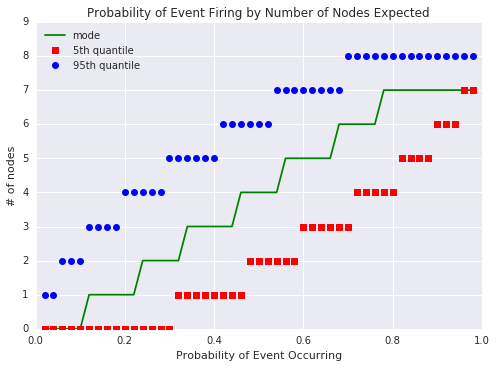

In [130]:
# We can create a graph showing the likely maximum number of nodes to fire within a given threshold
# Dependent: Probability p of individual event firing (success)
# Independent: max # of nodes to fire w/ probability of "threshold"
lo, hi = 0.05, 0.95
x = np.arange(n)
step = 2
probs = [2/100. * p for p in range(1, int(100/step))]
data = []
for p in probs:
    data.append((
        p,                                    # Probability of event occurring
        np.argmax(binom.pmf(range(n), n, p)), # Mode of the distribution
        binom.ppf(.05, n, p),                 # 5th percentile value
        binom.ppf(.95, n, p)                  # 95th percentile 
    ))
plt.plot(probs, [x[1] for x in data], 'g', label='mode')
plt.plot(probs, [x[2] for x in data], 'rs', label='5th quantile')
plt.plot(probs, [x[3] for x in data], 'bo', label='95th quantile')
plt.legend(loc='upper left')
plt.xlabel('Probability of Event Occurring')
plt.ylabel('# of nodes')
plt.ylim(ymax=9)
plt.title('Probability of Event Firing by Number of Nodes Expected')
plt.savefig('probnode.png')
plt.show()

In [128]:
# TODO Add the quantiles as a vertical bar. 
import pandas as pd
df = pd.DataFrame(data=data, columns=['probability', 'mode', '5th Percentile', '95th Percentile'])
g = sns.factorplot(x='probability', y='mode', hue='kind')

In [89]:
for p, l, h in zip(probs, lo, hi):
    print("{:.02f}=[{:.0f}, {:.0f}]; range={:.0f}".format(p, l, h, h - l))

0.05=[0, 2]; range=2
0.10=[0, 2]; range=2
0.15=[0, 3]; range=3
0.20=[0, 4]; range=4
0.25=[0, 4]; range=4
0.30=[0, 5]; range=5
0.35=[1, 5]; range=4
0.40=[1, 5]; range=4
0.45=[1, 6]; range=5
0.50=[2, 6]; range=4
0.55=[2, 7]; range=5
0.60=[3, 7]; range=4
0.65=[3, 7]; range=4
0.70=[3, 8]; range=5
0.75=[4, 8]; range=4
0.80=[4, 8]; range=4
0.85=[5, 8]; range=3
0.90=[6, 8]; range=2
0.95=[6, 8]; range=2
